#  Importing libraries

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 01. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [3]:
# Creating import path

path = r'C:\Users\Kozole\Desktop\CF Kurs\Excercise\4\Instacart Basket Analysis'

In [4]:
# Importing data set

df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_4.9.pkl'))

# 02. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
# Data check

df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32406041 entries, 0 to 32406040
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 object  
 7   order_number            int64   
 8   orders_day_of_week      int64   
 9   order_hour_of_day       int64   
 10  days_since_prior_order  float64 
 11  add_to_cart_order       int64   
 12  reordered               int64   
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spende

# The data does not contain personally identifiable information. The columns with the First and Last name ware removed during exercise 4.9.

# 03. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

# 03.1. Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [5]:
# Assigning States to specific region according article

region = []
for value in df_ords_prods_all['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value =='New Jersey'):
        region.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        region.append('Midwest')
    elif (value == 'Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value == 'Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
        region.append('West')
    else:
        region.append('South')

In [6]:
# Create the region column

df_ords_prods_all['region'] = region

In [9]:
# Data check

df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32406041 entries, 0 to 32406040
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 object  
 7   order_number            int64   
 8   orders_day_of_week      int64   
 9   order_hour_of_day       int64   
 10  days_since_prior_order  float64 
 11  add_to_cart_order       int64   
 12  reordered               int64   
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spende

# 03.2. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [7]:
# Crossing the region variable and spending flag

regions_spending = pd.crosstab(df_ords_prods_all['region'],df_ords_prods_all['spenders_flag'],dropna = False)

In [8]:
# viewing the crosstab 

regions_spending

spenders_flag,High spender,Low spender
region,,
Midwest,155979,7441606
Northeast,108226,5614713
South,209693,10582607
West,160354,8132863


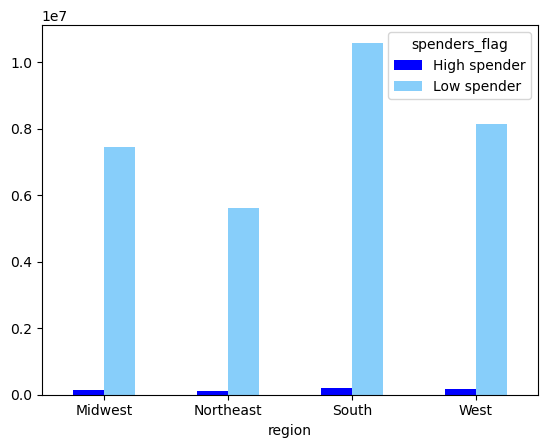

In [93]:
# Create a bar chart sorted from spending habits between the different U.S. regions

bar = regions_spending.plot.bar(rot = 0, color = ['blue', 'lightskyblue'])

In [23]:
#Exporting the bar chart sorted from spending habits between the different U.S. regions

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regions_spending.png'))

In [27]:
regions_spending.to_clipboard()

# It seems that her is no difference on the spending habits of the population in the different regions. The South seems to have most customers and the Northeast least customers, bit this can be a result of a difference in population numbers. 

# 04. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [9]:
# Creating the activity flag of '< 5 orders'

df_ords_prods_all.loc[df_ords_prods_all['max_order'] < 5, 'activity_flag'] = '< 5 orders'

In [10]:
# Creating the activity flag of '>= 5 orders'

df_ords_prods_all.loc[df_ords_prods_all['max_order'] >= 5, 'activity_flag'] = '>= 5 orders'

In [11]:
# Checking the activity flag

df_ords_prods_all['activity_flag'].value_counts(dropna = False)

>= 5 orders    30965686
< 5 orders      1440355
Name: activity_flag, dtype: int64

In [12]:
# Creating a subset from the activity flag for customers with '>= 5 orders'

df_without_low_customers = df_ords_prods_all.loc[df_ords_prods_all['activity_flag'] == '>= 5 orders']

In [30]:
# Data check

df_without_low_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30965686 entries, 0 to 32406029
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 object  
 7   order_number            int64   
 8   orders_day_of_week      int64   
 9   order_hour_of_day       int64   
 10  days_since_prior_order  float64 
 11  add_to_cart_order       int64   
 12  reordered               int64   
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spende

In [31]:
# Data check

df_without_low_customers.shape

(30965686, 33)

In [32]:
# Exporting the dataframe

df_without_low_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all_4.10.pkl'))

# 05. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [34]:
# Checking the min and max value of 'age' column

df_ords_prods_all['age'].agg(['min', 'max'])

min    18
max    81
Name: age, dtype: int64

In [39]:
# Checking values in 'family_status' column

df_ords_prods_all['family_status']. unique()

array(['married', 'living with parents and siblings', 'divorced/widowed',
       'single'], dtype=object)

In [35]:
# Checking the min and max value of 'number_of_dependants' column

df_ords_prods_all['number_of_dependants'].agg(['min', 'max'])

min    0
max    3
Name: number_of_dependants, dtype: int64

In [13]:
# Creating single adult profile

df_ords_prods_all.loc[(df_ords_prods_all['number_of_dependants'] == 0) & ((df_ords_prods_all['family_status'] == 'single') | (df_ords_prods_all['family_status'] == 'divorced/widowed') | (df_ords_prods_all['family_status'] == 'living with parents and siblings'
)), 'profile'] = 'Single'

In [14]:
# Creating 'Single Parent with 1 child' profile

df_ords_prods_all.loc[(df_ords_prods_all['number_of_dependants'] == 1) & ((df_ords_prods_all['family_status'] == 'single') | (df_ords_prods_all['family_status'] == 'divorced/widowed')| (df_ords_prods_all['family_status'] == 'living with parents and siblings'
)), 'profile'] = 'Single Parent with 1 child'

In [15]:
# Creating 'Single Parent with 2 children' profile

df_ords_prods_all.loc[(df_ords_prods_all['number_of_dependants'] == 2) & ((df_ords_prods_all['family_status'] == 'single') | (df_ords_prods_all['family_status'] == 'divorced/widowed')| (df_ords_prods_all['family_status'] == 'living with parents and siblings'
)), 'profile'] = 'Single Parent with 2 children'

In [16]:
# Creating 'Single Parent with 3 children' profile

df_ords_prods_all.loc[(df_ords_prods_all['number_of_dependants'] == 3) & ((df_ords_prods_all['family_status'] == 'single') | (df_ords_prods_all['family_status'] == 'divorced/widowed')| (df_ords_prods_all['family_status'] == 'living with parents and siblings'
)), 'profile'] = 'Single Parent with 3 children'

In [17]:
# Creating 'Couple without children' profile

df_ords_prods_all.loc[(df_ords_prods_all['number_of_dependants'] == 0) &  (df_ords_prods_all['family_status'] == 'married'), 'profile'] = 'Couple without children'

In [18]:
# Creating 'Couple with 1 child' profile

df_ords_prods_all.loc[(df_ords_prods_all['number_of_dependants'] == 1) &  (df_ords_prods_all['family_status'] == 'married'), 'profile'] = 'Couple with 1 child'

In [19]:
# Creating 'Couple with 2 children' profile

df_ords_prods_all.loc[(df_ords_prods_all['number_of_dependants'] == 2) &  (df_ords_prods_all['family_status'] == 'married'), 'profile'] = 'Couple with 2 children'

In [20]:
# Creating 'Couple with 2 children' profile

df_ords_prods_all.loc[(df_ords_prods_all['number_of_dependants'] == 3) &  (df_ords_prods_all['family_status'] == 'married'), 'profile'] = 'Couple with 3 children'

In [21]:
# Checking for profiles
df_ords_prods_all['profile'].value_counts(dropna = False)

Single                           8097859
Couple with 3 children           7622929
Couple with 2 children           7583419
Couple with 1 child              7551193
Single Parent with 1 child        530216
Single Parent with 3 children     512448
Single Parent with 2 children     507977
Name: profile, dtype: int64

# 06. Create an appropriate visualization to show the distribution of profiles.

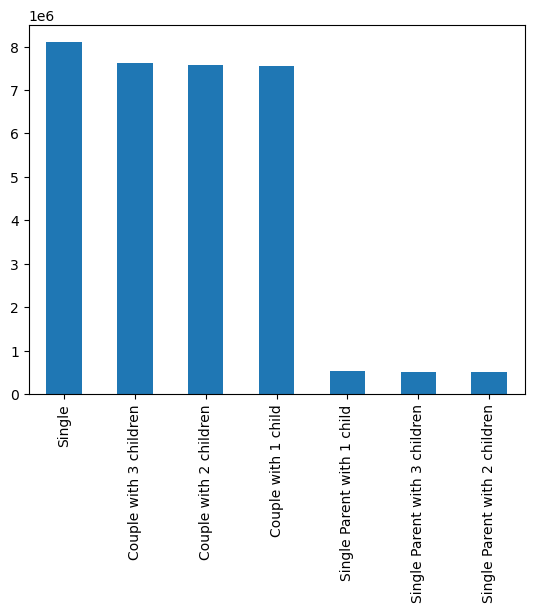

In [98]:
# Profile distribution 

bar_2 = df_ords_prods_all['profile'].value_counts().plot.bar()

In [99]:
# Exporting the visualiation

bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_distibution_bar.png'))

# 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [100]:
# Grouping profiles by mean, max, and min (for expenditure and usage frequency)

df_ords_prods_all.groupby('profile').agg({'prices': ['mean', 'max', 'min'], 'days_since_prior_order': ['mean', 'max', 'min']})

prices            days_since_prior_order  \
                                   mean   max  min                   mean   
profile                                                                     
Couple with 1 child            7.795671  25.0  1.0              11.113182   
Couple with 2 children         7.784653  25.0  1.0              11.117192   
Couple with 3 children         7.791673  25.0  1.0              11.118200   
Single                         7.789944  25.0  1.0              11.080822   
Single Parent with 1 child     7.798961  25.0  1.0              10.913772   
Single Parent with 2 children  7.780717  25.0  1.0              11.253887   
Single Parent with 3 children  7.822283  25.0  1.0              10.983639   

                                          
                                max  min  
profile                                   
Couple with 1 child            30.0  0.0  
Couple with 2 children         30.0  0.0  
Couple with 3 children         30.0  0.0  
Single                         30.0  0.0  
Single Parent with 1 child     30.0  0.0  
Single Parent with 2 children  30.0  0.0  
Single Parent with 3 children  30.0  0.0

# 08. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [101]:
# Creting crosstab between profiles and regions

crosstab_profiles_regions = pd.crosstab(df_ords_prods_all['region'], df_ords_prods_all['profile'], dropna = False)

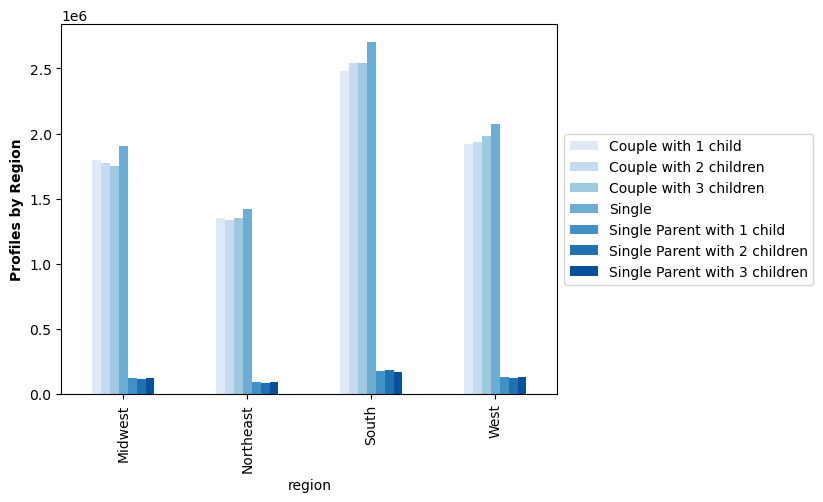

In [124]:
# Createing a stacked bar chart

profiles_by_region = crosstab_profiles_regions.plot(kind='bar', color=sns.color_palette('Blues', 7))
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Profiles by Region', fontweight='bold')
plt.show()




In [125]:
# Exporting the visualiation

profiles_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_by_region_bar.png'))

In [126]:
# Creting crosstab between profiles and departments

crosstab_profiles_department = pd.crosstab(df_ords_prods_all['department_id'], df_ords_prods_all['profile'], dropna = False)

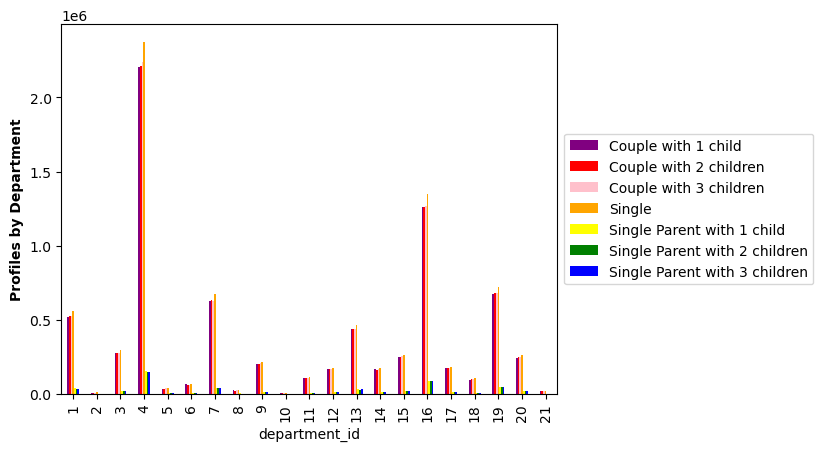

In [140]:
# Createing a stacked bar chart

profiles_by_departments = crosstab_profiles_department.plot(kind='bar', color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Profiles by Department', fontweight='bold')
plt.show()


In [141]:
# Exporting the visualiation

profiles_by_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_by_departments_bar_1.png'))

# 09. Produce suitable charts to illustrate your results and export them in your project folder.

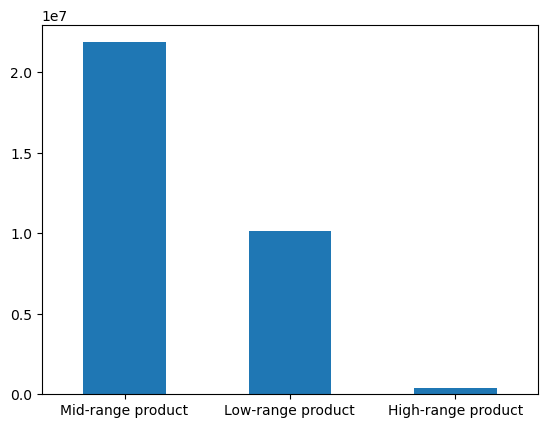

In [149]:
bar_product_range=df_ords_prods_all['price_range_loc'].value_counts().plot.bar(rot = 0)
plt.show()

In [150]:
# Exporting the visualiation

bar_product_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'product_range_bar.png'))

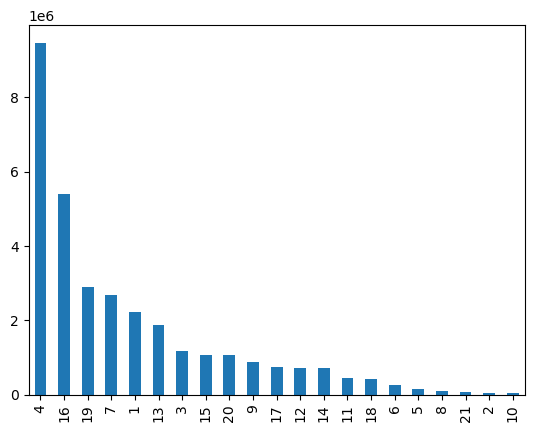

In [155]:
# Creating a chart for department popularity

popular_dept_count = df_ords_prods_all['department_id'].value_counts(dropna=False)
popular_dept = popular_dept_count.plot.bar()

In [156]:
# Exporting the visualiation

popular_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'popular_dept_bar.png'))

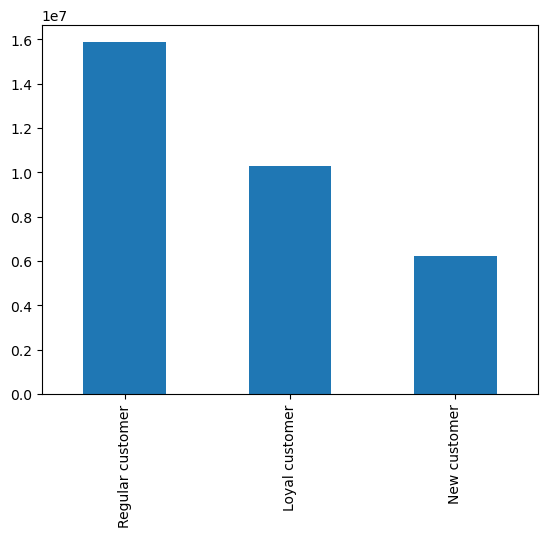

In [24]:
# Creating a chart for distribution among users in regards to their brand loyalty

user_loyalty_count = df_ords_prods_all['loyalty_flag'].value_counts(dropna=False)
user_loyalty = user_loyalty_count.plot.bar()

In [25]:
# Exporting the visualiation

user_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'user_loyalty_bar.png'))

In [26]:
# Creting crosstab between region and frequency_flag

regional_frequency_crosstab = pd.crosstab(df_ords_prods_all['region'], df_ords_prods_all['frequency_flag'], dropna = False)

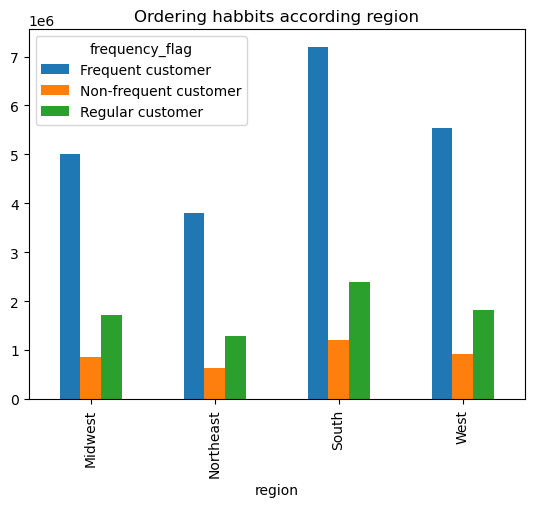

In [29]:
# Creating a chart for ordering habbits according region

regional_frequency_bar = regional_frequency_crosstab.plot(kind = 'bar', stacked = False, title = 'Ordering habbits according region')

In [30]:
# Exporting the visualiation

regional_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ordering_habbits_bar.png'))

In [31]:
# Creting crosstab between family status and frequency_flag

family_status_frequency_crosstab = pd.crosstab(df_ords_prods_all['family_status'], df_ords_prods_all['frequency_flag'], dropna = False)

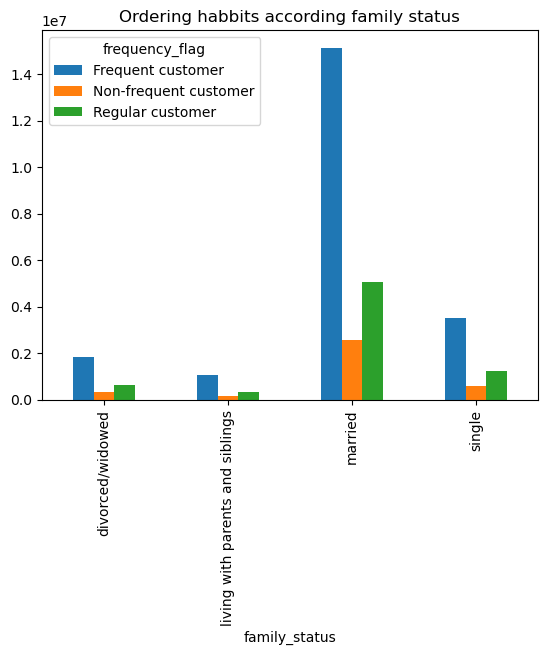

In [32]:
# Creating a chart for ordering habbits according family status

family_status_frequency_bar = family_status_frequency_crosstab.plot(kind = 'bar', stacked = False, title = 'Ordering habbits according family status')

In [33]:
# Exporting the visualiation

family_status_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ordering_habbits_family_status_bar.png'))